<a href="https://colab.research.google.com/github/Virvivek007/E-commerce-Product-Recommendation-system/blob/main/E_Commerce_Product_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **E-commerce Product Recommendation System**

In [1]:
#Importing Python Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load data
data = pd.read_csv("/content/E-commerce-product_dataset.csv")

In [3]:
#display 5 data
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [4]:
#Show the Information of Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [5]:
#All Unique Details of Different category in Dataset
data.nunique()

,0
Region,7
Country,76
Item Type,12
Sales Channel,2
Order Priority,4
Order Date,100
Order ID,100
Ship Date,99
Units Sold,99
Unit Price,12


In [6]:
#Describe about the dataset
data.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [7]:
data.duplicated().sum()

np.int64(0)

In [8]:
data.isnull().sum()

,0
Region,0
Country,0
Item Type,0
Sales Channel,0
Order Priority,0
Order Date,0
Order ID,0
Ship Date,0
Units Sold,0
Unit Price,0


In [9]:
#show different Item Type by Region
data[['Item Type','Region']].head(15)

,Item Type,Region
0,Baby Food,Australia and Oceania
1,Cereal,Central America and the Caribbean
2,Office Supplies,Europe
3,Fruits,Sub-Saharan Africa
4,Office Supplies,Sub-Saharan Africa
5,Baby Food,Australia and Oceania
6,Household,Sub-Saharan Africa
7,Vegetables,Sub-Saharan Africa
8,Personal Care,Sub-Saharan Africa
9,Cereal,Sub-Saharan Africa


In [10]:
#Display Total Unit sold of different Items Country wise
data[['Units Sold','Item Type','Country']].head(20)

,Units Sold,Item Type,Country
0,9925,Baby Food,Tuvalu
1,2804,Cereal,Grenada
2,1779,Office Supplies,Russia
3,8102,Fruits,Sao Tome and Principe
4,5062,Office Supplies,Rwanda
5,2974,Baby Food,Solomon Islands
6,4187,Household,Angola
7,8082,Vegetables,Burkina Faso
8,6070,Personal Care,Republic of the Congo
9,6593,Cereal,Senegal


# **Data Visualiztion**

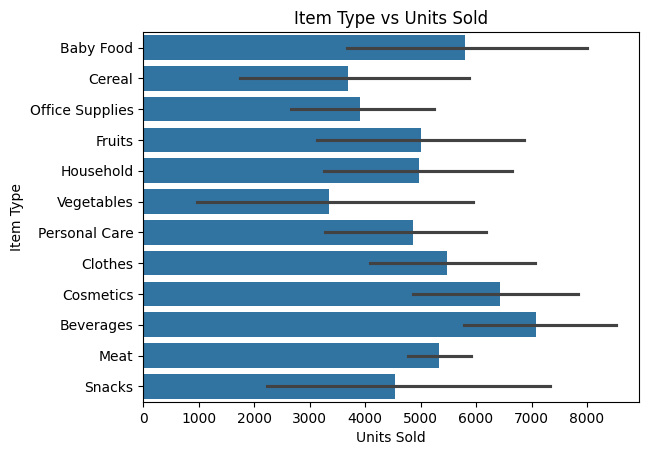

In [11]:
#Display Barchart
sns.barplot(y='Item Type', x='Units Sold',data=data)
plt.title('Item Type vs Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Item Type')
plt.show()

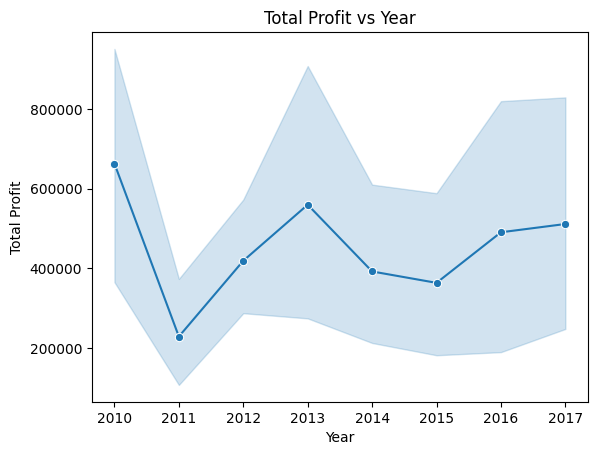

In [12]:
# Ensure date column is datetime
data['date'] = pd.to_datetime(data['Order Date'], format='%m/%d/%Y')

# Extract year
data['Year'] = data['date'].dt.year

# Line plot of Total Profit vs Year
sns.lineplot(x='Year', y='Total Profit', data=data, marker='o')
plt.title('Total Profit vs Year')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.show()

In [13]:
import plotly.express as px
channel_sales = data.groupby(['Sales Channel'])['Units Sold'].sum().reset_index()
fig = px.pie(channel_sales, values="Units Sold", names="Sales Channel", title="Online vs Offline Sales Share")
fig.show()

In [14]:
country_sales = data.groupby(['Country'])['Units Sold'].sum().reset_index()
fig = px.choropleth(country_sales, locations="Country", locationmode="country names",
                    color="Units Sold", hover_name="Country",
                    title="Country-wise Sales Distribution")
fig.show()

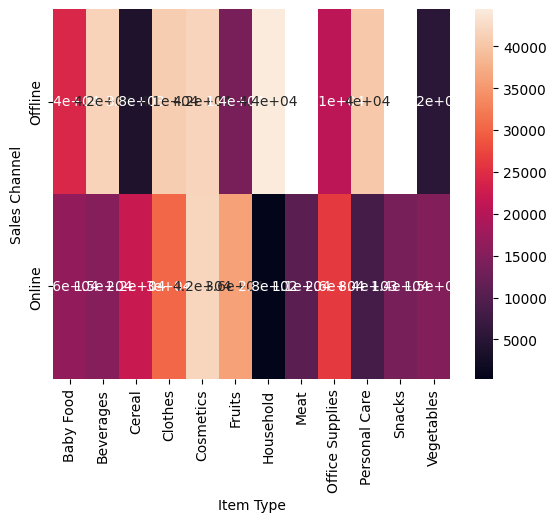

In [15]:
#Display Heatmap of sales channel by Item Type
sns.heatmap(data.pivot_table(values='Units Sold', index='Sales Channel', columns='Item Type', aggfunc='sum'), annot=True)
plt.show()

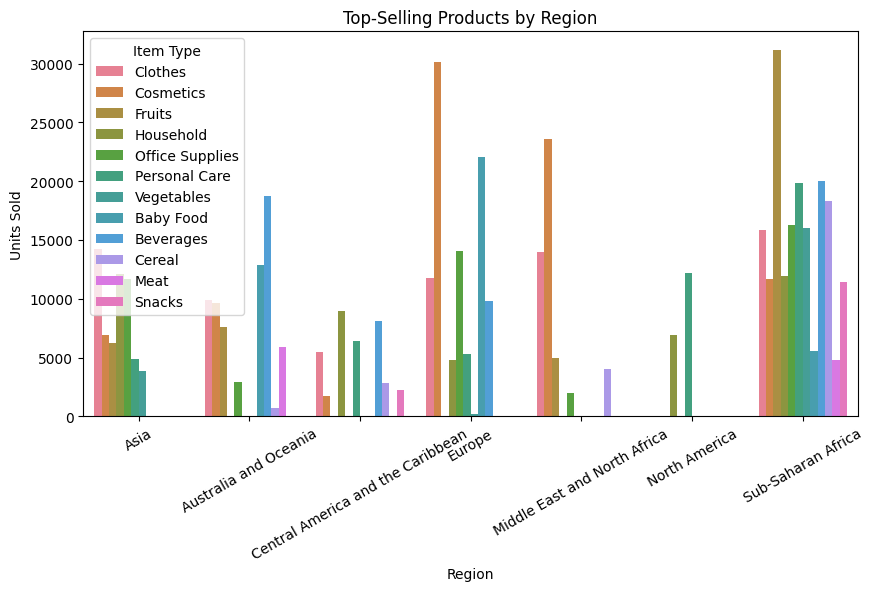

In [16]:
#  Top-selling products by Region

region_products = data.groupby(['Region', 'Item Type'])['Units Sold'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x="Region", y="Units Sold", hue="Item Type", data=region_products)
plt.title("Top-Selling Products by Region")
plt.xticks(rotation=30)
plt.show()

# **Machine Learning Techniques to Recommend Products**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity


# Convert order date to datetime and extract year
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Year'] = data['Order Date'].dt.year

# ---- Popularity-based Recommendation ----
def recommend_popular(region=None, channel=None, top_n=5):
    df = data.copy()
    if region:
        df = df[df['Region'] == region]
    if channel:
        df = df[df['Sales Channel'] == channel]

    top_products = (df.groupby('Item Type')['Units Sold']
                      .sum()
                      .sort_values(ascending=False)
                      .head(top_n))
    return top_products

print("Top Products in Europe (Online):")
print(recommend_popular(region="Europe", channel="Online"))


# ---- Content-based Filtering ----
# Encode categorical features
features = ['Item Type', 'Region', 'Country', 'Sales Channel']
encoded_data = data[features].apply(LabelEncoder().fit_transform)

# Compute similarity matrix
similarity = cosine_similarity(encoded_data)

def recommend_similar(item_index, top_n=5):
    sim_scores = list(enumerate(similarity[item_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    recommended_items = data.iloc[[i[0] for i in sim_scores]][['Item Type','Region','Country','Sales Channel']]
    return recommended_items

print("\nSimilar products to row 0:")
print(recommend_similar(0))


Top Products in Europe (Online):
Item Type
Cosmetics          18592
Baby Food          13473
Personal Care       5343
Office Supplies     3987
Clothes             3942
Name: Units Sold, dtype: int64

Similar products to row 0:
    Item Type                             Region          Country  \
5   Baby Food              Australia and Oceania  Solomon Islands   
94  Beverages  Central America and the Caribbean        Nicaragua   
89  Beverages                             Europe         Slovenia   
61  Baby Food                             Europe       San Marino   
21  Baby Food                             Europe         Portugal   

   Sales Channel  
5         Online  
94       Offline  
89       Offline  
61        Online  
21        Online  


# **Forecast future demand per item type/year**

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

/usr/local/lib/python3.12/dist-packages/s

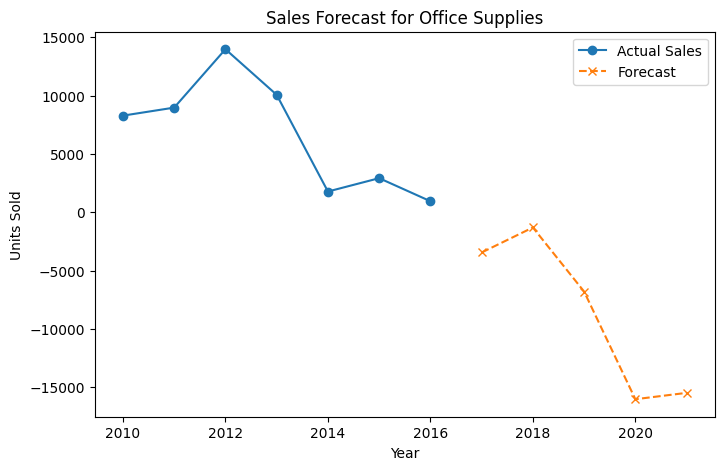

(      Units Sold
 Year            
 2012       13982
 2013       10072
 2014        1779
 2015        2924
 2016         948,
 7     -3448.999454
 8     -1305.045255
 9     -6800.618083
 10   -16031.184416
 11   -15485.867953
 Name: predicted_mean, dtype: float64)

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Convert Order Date to datetime & extract Year
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d-%m-%Y')
data['Year'] = data['Order Date'].dt.year

# Aggregate Units Sold by Year and Item Type
trend_data = data.groupby(['Year', 'Item Type'])['Units Sold'].sum().reset_index()

# Example Forecast for "Office Supplies"
product = "Office Supplies"
product_sales = trend_data[trend_data['Item Type'] == product][['Year', 'Units Sold']]
product_sales = product_sales.set_index('Year')

# Fit SARIMA model
model = SARIMAX(product_sales, order=(1,1,1), seasonal_order=(1,1,1,3))
results = model.fit(disp=False)

# Forecast for next 5 years
forecast = results.get_forecast(steps=5)
forecast_index = range(product_sales.index.max()+1, product_sales.index.max()+6)
forecast_values = forecast.predicted_mean

# Plot actual vs forecast
plt.figure(figsize=(8,5))
plt.plot(product_sales.index, product_sales['Units Sold'], marker='o', label="Actual Sales")
plt.plot(forecast_index, forecast_values, marker='x', linestyle='--', label="Forecast")
plt.title(f"Sales Forecast for {product}")
plt.xlabel("Year")
plt.ylabel("Units Sold")
plt.legend()
plt.show()

product_sales.tail(), forecast_values
